In [7]:
Get-Runspace


 Id Name            ComputerName    Type          State         Availability
 -- ----            ------------    ----          -----         ------------
  1 Runspace1       localhost       Local         Opened        Busy



In [8]:
  $RunSpace   = [runspacefactory]::CreateRunspace()




 Id Name            ComputerName    Type          State         Availability
 -- ----            ------------    ----          -----         ------------
  1 Runspace1       localhost       Local         Opened        Busy
  3 Runspace3       localhost       Local         BeforeOpen    None



In [9]:
$RunSpace.Name  = "NewTestRunSpace"

Get-Runspace  


 Id Name            ComputerName    Type          State         Availability
 -- ----            ------------    ----          -----         ------------
  1 Runspace1       localhost       Local         Opened        Busy
  3 NewTestRunSpace localhost       Local         BeforeOpen    None



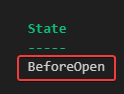

In [10]:
$RunSpace.Open()

Get-Runspace


 Id Name            ComputerName    Type          State         Availability
 -- ----            ------------    ----          -----         ------------
  1 Runspace1       localhost       Local         Opened        Busy
  3 NewTestRunSpace localhost       Local         Opened        Available



In [11]:
$RunSpace.Close()

Get-Runspace


 Id Name            ComputerName    Type          State         Availability
 -- ----            ------------    ----          -----         ------------
  1 Runspace1       localhost       Local         Opened        Busy
  3 NewTestRunSpace localhost       Local         Closed        None



In [12]:
$RunSpace.Dispose()

Get-Runspace


 Id Name            ComputerName    Type          State         Availability
 -- ----            ------------    ----          -----         ------------
  1 Runspace1       localhost       Local         Opened        Busy



In [ ]:
# $PowerShellCheck            = [powershell]::Create()
# $PowerShellCheck.Runspace   = $RunSpace
    

# $NewRunSpace = Get-Runspace | Where-Object {$_.Name -eq $RunspaceRefreshMonitor}